In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# 取第一筆
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


這個是: 5


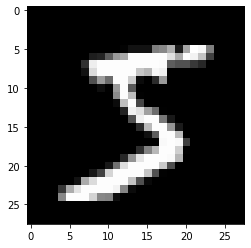

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("這個是:", y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 64 * 784 + 64 = 50240
model.add(Dense(256, activation="relu", input_dim=784))
# 64 * 10 + 10(bias) 需要一個常數偏移回原點
model.add(Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
             optimizer="adam",
             metrics=["accuracy"])

In [8]:
# 預處理
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:",y_train[2])
print("處理過:",y_train_cat[2])

原本: 4
處理過: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# -1: 自動計算(一個位置)
# 圖片: 1D化 -> /255(normalize)
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [10]:
# batch_size: 看多少筆資料做一次梯度下降(圖片不大:100-200, 圖片大: 10-20)
# validation_split: 切出一部份作為驗證資料作為判斷模型好壞
# epochs: 整份資料集看多少遍
# 一個epoch做了 540000/200 = 270 次梯度下降
# verbose(選用):0(quiet), 1(noisy), 2(normal)
# val_loss先用肉眼觀察,趨近平滑就停下來,防止過度訓練
model.fit(x_train_norm,
         y_train_cat,    
         batch_size=200,
         validation_split=0.1,
         epochs=20,
         verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 - 1s - loss: 0.3716 - accuracy: 0.8979 - val_loss: 0.1618 - val_accuracy: 0.9580
Epoch 2/20
54000/54000 - 1s - loss: 0.1682 - accuracy: 0.9525 - val_loss: 0.1196 - val_accuracy: 0.9677
Epoch 3/20
54000/54000 - 1s - loss: 0.1181 - accuracy: 0.9664 - val_loss: 0.0978 - val_accuracy: 0.9717
Epoch 4/20
54000/54000 - 1s - loss: 0.0892 - accuracy: 0.9743 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 5/20
54000/54000 - 1s - loss: 0.0695 - accuracy: 0.9809 - val_loss: 0.0864 - val_accuracy: 0.9738
Epoch 6/20
54000/54000 - 1s - loss: 0.0569 - accuracy: 0.9838 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 7/20
54000/54000 - 1s - loss: 0.0456 - accuracy: 0.9875 - val_loss: 0.0747 - val_accuracy: 0.9787
Epoch 8/20
54000/54000 - 1s - loss: 0.0376 - accuracy: 0.9897 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 9/20
54000/54000 - 1s - loss: 0.0307 - accuracy: 0.9920 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 10/20
540

In [11]:
# 只要還在tf裡, 請代入one hot encoding
model.evaluate(x_test_norm,y_test_cat, verbose=2)

10000/10000 - 0s - loss: 0.0734 - accuracy: 0.9801


[0.07335212854248675, 0.9801]

In [14]:
# predict: 給機率 predict_classes: 給類別
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
# 不在TF裡,帶入原本的y
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),972,0,2,0,1,0,3,1,1,0
1(真實),1,1122,3,1,0,1,2,3,2,0
2(真實),4,0,1007,3,2,0,3,7,5,1
3(真實),1,0,1,996,0,3,0,6,2,1
4(真實),1,0,3,0,958,0,2,5,1,12
5(真實),2,0,0,11,0,869,3,2,4,1
6(真實),5,2,2,1,2,2,944,0,0,0
7(真實),0,2,9,2,0,0,0,1012,0,3
8(真實),2,0,6,7,5,2,2,7,939,4
9(真實),3,2,0,8,4,2,1,6,1,982


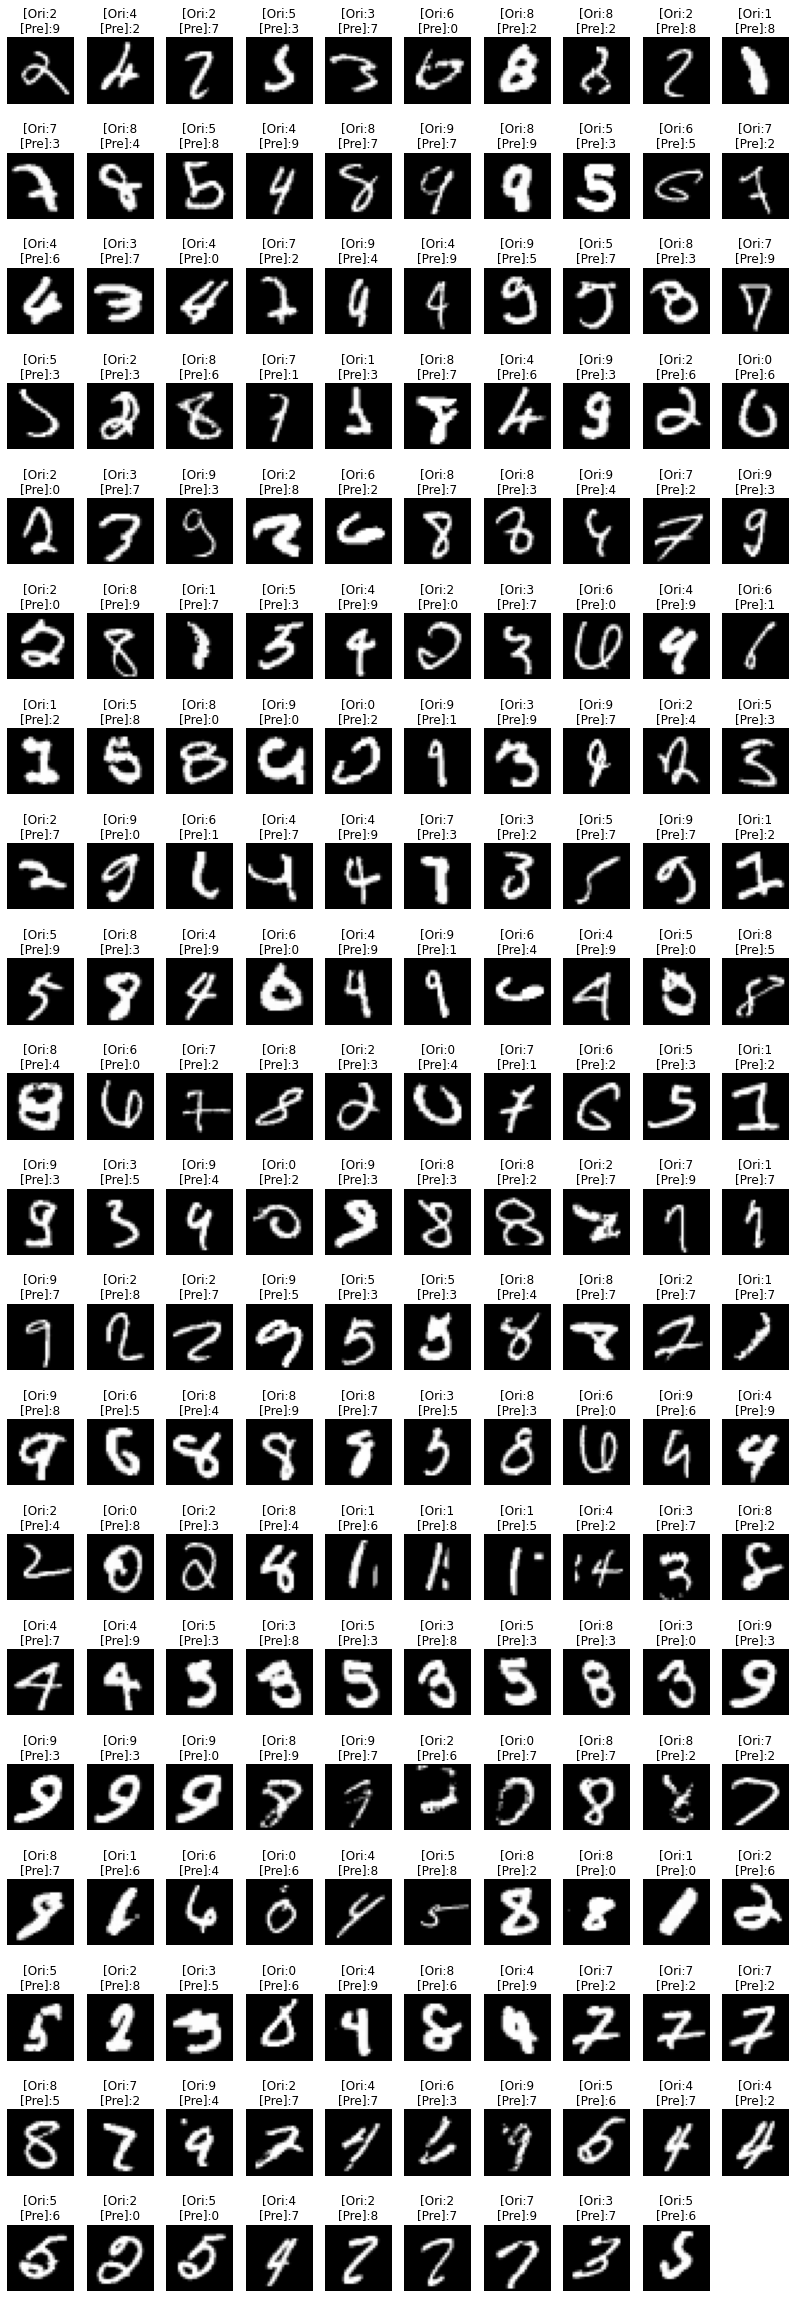

In [21]:
import numpy as np
# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖
false_img = x_test[idx]
false_ans = y_test[idx]
false_pre = pre[idx]

# 變大圖才塞得下
plt.figure(figsize=(14,42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori:{}\n[Pre]:{}".format(false_ans[i],
                                   false_pre[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", ans)
plt.imshow(img, cmap="gray")